# XGBoost


## Omajinai

In [1]:
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 6)
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "jupyterlab"

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import xgboost

/home/eunchong/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning:

0.23ubuntu1 is an invalid version and will not be supported in a future release

/home/eunchong/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning:

0.1.36ubuntu1 is an invalid version and will not be supported in a future release



In [3]:
print('pandas', pd.__version__)
print('xgboost', xgboost.__version__)

pandas 1.3.5
xgboost 1.5.1


## Data

In [4]:
!wget https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv -O newly_confirmed_cases_daily.csv

--2022-02-08 20:35:15--  https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv
Resolving covid19.mhlw.go.jp (covid19.mhlw.go.jp)... 13.224.141.128, 13.224.141.109, 13.224.141.110, ...
Connecting to covid19.mhlw.go.jp (covid19.mhlw.go.jp)|13.224.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102322 (100K) [application/octet-stream]
Saving to: ‘newly_confirmed_cases_daily.csv’

newly_confirmed_cas 100%[===================>]  99.92K  --.-KB/s    in 0.08s   

2022-02-08 20:35:16 (1.20 MB/s) - ‘newly_confirmed_cases_daily.csv’ saved [102322/102322]



In [5]:
df = pd.read_csv('newly_confirmed_cases_daily.csv', index_col=0)
df.index = pd.to_datetime(df.index)
print(df.shape)
display(df.head(1))
display(df.tail(5))

(754, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-03,96748,3788,392,175,683,189,350,582,1374,925,...,339,259,5272,560,565,884,391,392,622,652
2022-02-04,95364,3543,460,202,697,152,325,500,1445,908,...,263,201,5120,538,566,916,500,368,685,709
2022-02-05,100870,4046,408,144,744,221,259,542,1555,856,...,313,248,5607,518,603,921,446,314,609,671
2022-02-06,89080,3464,428,122,617,174,195,514,1668,736,...,179,220,3946,335,422,653,388,323,523,511
2022-02-07,67984,2687,260,98,423,97,221,338,1487,466,...,159,136,3191,420,297,494,322,170,450,316


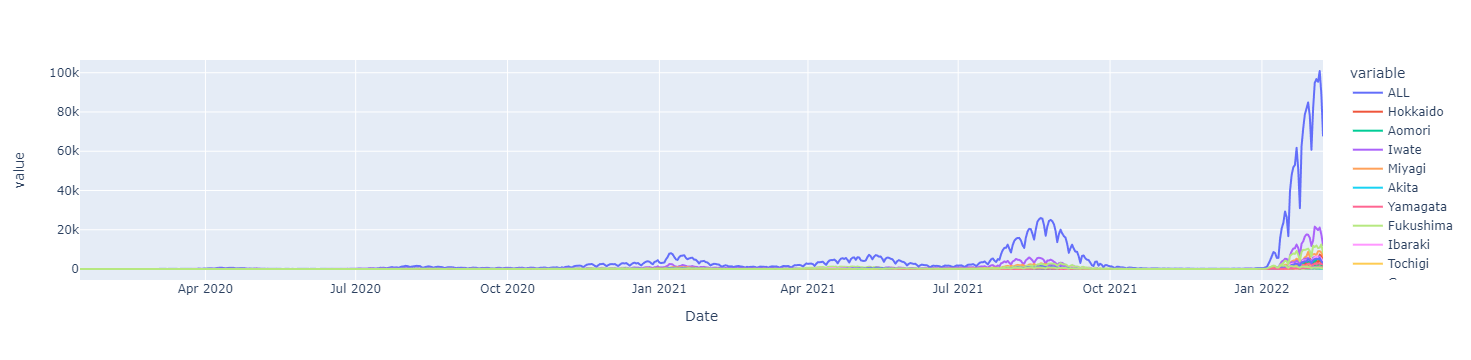

In [6]:
px.line(df, )

In [7]:
df_gr = df.groupby(pd.Grouper(level='Date', freq='W')).mean()
df_gr = df_gr.drop(df_gr.index[-1])
print(df_gr.shape)
display(df_gr.head(1))
display(df_gr.tail(5))

(108, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-19,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-09,4625.428571,72.857143,5.428571,5.142857,11.142857,0.428571,5.142857,15.428571,41.428571,38.714286,...,16.142857,3.714286,106.857143,21.857143,20.000000,19.428571,10.714286,7.714286,53.142857,953.428571
2022-01-16,18116.714286,366.857143,74.285714,12.571429,58.285714,16.142857,28.571429,41.714286,227.000000,146.714286,...,120.428571,19.285714,654.285714,107.857143,118.000000,233.857143,62.285714,67.285714,80.857143,1380.142857
2022-01-23,45924.142857,1220.857143,183.857143,30.142857,185.428571,39.142857,61.285714,86.571429,641.285714,312.428571,...,222.000000,53.571429,1989.285714,212.142857,305.714286,461.285714,221.285714,242.857143,248.285714,1178.285714
2022-01-30,69765.714286,2251.428571,285.571429,113.000000,446.857143,216.571429,173.714286,333.571429,814.428571,563.571429,...,293.571429,149.571429,3645.857143,348.285714,539.857143,935.000000,371.571429,379.857143,516.428571,1009.571429
2022-02-06,88454.285714,3336.285714,379.142857,146.428571,618.428571,181.000000,263.571429,504.285714,1264.142857,822.571429,...,269.714286,218.285714,4630.000000,496.714286,550.000000,877.428571,430.857143,348.000000,605.428571,646.000000


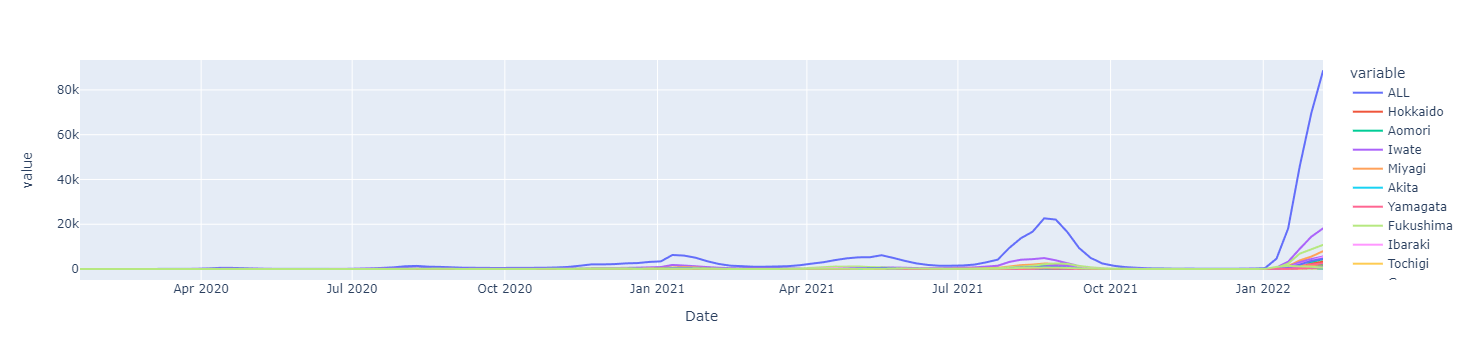

In [8]:
px.line(df_gr,)

### Scale

In [9]:
sc = MinMaxScaler(feature_range=(0,1))
ts_all = df_gr.ALL
ts_all_sc = sc.fit_transform(ts_all.values.reshape(-1, 1)).ravel()
ts_all_sc = pd.Series(ts_all_sc, index=ts_all.index)
ts_all_sc.head(1)

Date
2020-01-19    0.0
Freq: W-SUN, dtype: float64

### FE

In [10]:
forecast_weeks = 12
# df_fe = df_gr.ALL.to_frame()
df_fe = ts_all_sc.to_frame(name='ALL')

# add new rows for forecast
index_list = pd.date_range(ts_all_sc.index[-1]+relativedelta(weeks=1), ts_all_sc.index[-1]+relativedelta(weeks=forecast_weeks), freq='W')
df_fe = pd.concat([df_fe, pd.DataFrame(index=index_list)])

# shift
for i in range(forecast_weeks, forecast_weeks+12):
    df_fe[f'ALL_{i}_week_ago'] = df_fe.ALL.shift(i)
# df_fe[f'ALL_12_week_ago'] = df_fe.ALL.shift(12)
df_fe['year'] = df_fe.index.year
df_fe['month'] = df_fe.index.month
df_fe['weekofyear'] = df_fe.index.isocalendar().week
df_fe = df_fe.astype('float')
df_fe = df_fe.loc[df_fe.ALL_23_week_ago.dropna().index, :]
df_fe

,ALL,ALL_12_week_ago,ALL_13_week_ago,ALL_14_week_ago,ALL_15_week_ago,ALL_16_week_ago,ALL_17_week_ago,ALL_18_week_ago,ALL_19_week_ago,ALL_20_week_ago,ALL_21_week_ago,ALL_22_week_ago,ALL_23_week_ago,year,month,weekofyear
2020-06-28,0.000900,0.003080,0.001262,0.000435,0.000512,0.000378,0.000178,0.000122,0.000021,0.000002,0.000010,0.000002,0.000000,2020.0,6.0,26.0
2020-07-05,0.002053,0.005616,0.003080,0.001262,0.000435,0.000512,0.000378,0.000178,0.000122,0.000021,0.000002,0.000010,0.000002,2020.0,7.0,27.0
2020-07-12,0.003411,0.005600,0.005616,0.003080,0.001262,0.000435,0.000512,0.000378,0.000178,0.000122,0.000021,0.000002,0.000010,2020.0,7.0,28.0
2020-07-19,0.005443,0.004292,0.005600,0.005616,0.003080,0.001262,0.000435,0.000512,0.000378,0.000178,0.000122,0.000021,0.000002,2020.0,7.0,29.0
2020-07-26,0.008358,0.002654,0.004292,0.005600,0.005616,0.003080,0.001262,0.000435,0.000512,0.000378,0.000178,0.000122,0.000021,2020.0,7.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-03,NaN,0.052289,0.004355,0.002530,0.001674,0.001296,0.001265,0.001015,0.001531,0.002031,0.002169,0.003140,0.003574,2022.0,4.0,13.0
2022-04-10,NaN,0.204812,0.052289,0.004355,0.002530,0.001674,0.001296,0.001265,0.001015,0.001531,0.002031,0.002169,0.003140,2022.0,4.0,14.0
2022-04-17,NaN,0.519184,0.204812,0.052289,0.004355,0.002530,0.001674,0.001296,0.001265,0.001015,0.001531,0.002031,0.002169,2022.0,4.0,15.0
2022-04-24,NaN,0.788720,0.519184,0.204812,0.052289,0.004355,0.002530,0.001674,0.001296,0.001265,0.001015,0.001531,0.002031,2022.0,4.0,16.0


### split

In [11]:
X = df_fe.drop('ALL', axis=1)
y = df_fe.ALL
print(X.shape, y.shape)

(97, 15) (97,)


## functions

In [12]:
def trainXGBoost(X_train, y_train):    
    # val
    X_val = X_train[X_train.index == X_train.index[-1]]
    X_train = X_train.drop(X_train.index[-1])
    y_val = y_train[y_train.index == y_train.index[-1]]
    y_train = y_train.drop(y_train.index[-1])
    
    params = {'n_estimators': 1000, 'random_state': 42, 'objective': 'reg:squarederror', 'booster': 'gblinear'}
    
    model = xgboost.XGBRegressor(**params)
    model.fit(
        X_train, y_train, verbose=0,
        eval_set=[(X_val, y_val)], eval_metric='rmse', early_stopping_rounds=10,
    )

    return model

## forecast

(80, 15) (80,)
CPU times: user 616 ms, sys: 6.11 ms, total: 622 ms
Wall time: 102 ms


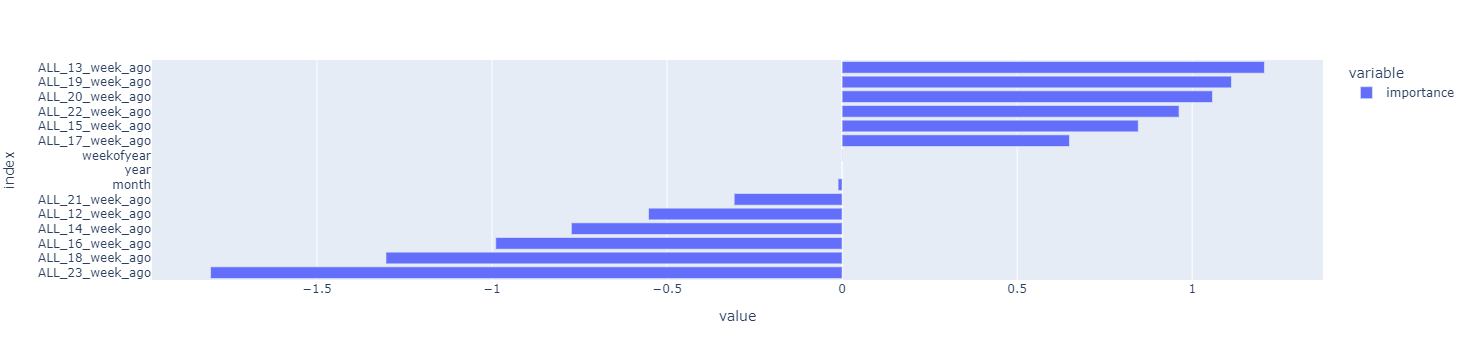

In [13]:
%%time

train_last_date = '2022-01-02'
X_train = X[X.index <= train_last_date]
y_train = y[y.index <= train_last_date]
print(X_train.shape, y_train.shape)

model = trainXGBoost(X_train, y_train)

fi = pd.DataFrame(model.coef_, index=X_train.columns, columns=['importance']).sort_values('importance')
px.bar(fi, orientation='h')

RMSE: 5751.7


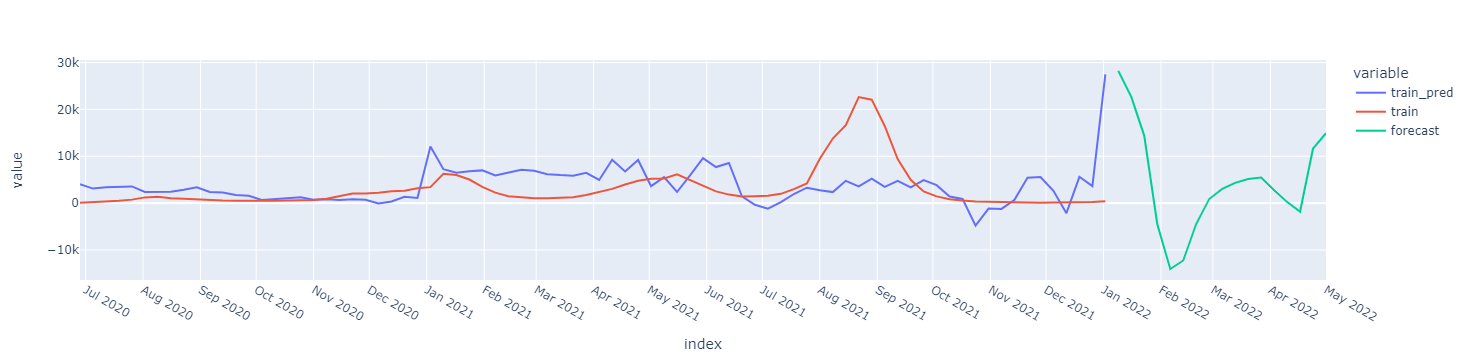

In [14]:
X_train = X[X.index <= train_last_date]
y_train = y[y.index <= train_last_date]
X_train = X[X.index <= train_last_date]
y_train = y[y.index <= train_last_date]
y_train_index = y_train.index

y_train_pred = model.predict(X_train)
y_train_pred = sc.inverse_transform(y_train_pred.reshape(-1, 1)).ravel()
y_train_pred = pd.Series(y_train_pred, index=y_train_index, name='train_pred')
y_train = sc.inverse_transform(y_train.values.reshape(-1, 1)).ravel()
y_train = pd.Series(y_train, index=y_train_index, name='train')

rmse = np.sqrt( mean_squared_error(y_train, y_train_pred) )
print('RMSE: {:.5}'.format(rmse))

X_forecast = X[X.index > train_last_date]
y_forecast = y[y.index > train_last_date]
y_forecast_index = y_forecast.index

y_forecast = model.predict(X_forecast)
y_forecast = sc.inverse_transform(y_forecast.reshape(-1, 1)).ravel()
y_forecast = pd.Series(y_forecast, index=y_forecast_index, name='forecast')

fig = px.line(pd.concat([y_train_pred, y_train, y_forecast], axis=1))
fig.update_layout({
    'xaxis': {
        'dtick': 'M1'
    }
})
fig.show()